# ☘️ PLANT DISEASE CLASSIFICATION USING CNN ☘️

## 1. Problem Definition 🤔
In our case, the problem we will be exploring is **multiclass classification** (a image can belong to any one class among all available classes). 

In a statement,

> Given a image of plant,we need to build a model, which can classify between healthy and diseased crop leaves and also if the crop have any disease, predict which disease is it

# Our goal 🎯
Goal is clear and simple. We need to build a model, which can classify between healthy and diseased crop leaves and also if the crop have any disease, predict which disease is it.

**Let's get started....**

## 2. Data 🗄️

This dataset is created using offline augmentation from the original dataset. The original PlantVillage Dataset can be found [here](https://github.com/spMohanty/PlantVillage-Dataset).This dataset consists of about 87K rgb images of healthy and diseased crop leaves which is categorized into 38 different classes. The total dataset is divided into 80/20 ratio of training and validation set preserving the directory structure. A new directory containing 33 test images is created later for prediction purpose.

Note: This description is given in the dataset itself


## 3. Evaluation ✔️

The evaluation metric is something you might define at the start of a project.

Since deep learning is very experimental, you might say something like, 

> If we can reach 90% accuracy at predicting whether or not a person in image is wearing a mask or not, we'll pursure this project.

The reason this is helpful is it provides a rough goal for a deep learning engineer or data scientist to work towards.

However, due to the nature of experimentation, the evaluation metric may change over time.

## Preparing the tools 🧰

At the start of any project, it's custom to see the required libraries imported in a big chunk.

The libraries we use will differ from project to project. But there are a few which will you'll likely take advantage of during almost every structured data project. 

* [pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/)/[seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
* [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.
* [Tensorflow](https://www.tensorflow.org/)/[Keras](https://keras.io/) for deep learning modelling and transfer learning.

In [ ]:
import seaborn as sns
import os
import pathlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

## Kaggle Setup For Dataset 💽

In [ ]:
# Install the Kaggle library
! pip install kaggle

# Make a directory named “.kaggle”
! mkdir ~/.kaggle

# Copy the “kaggle.json” into this new directory
! cp kaggle.json ~/.kaggle/

# Allocate the required permission for this file.
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download vipoooool/new-plant-diseases-dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 99% 2.68G/2.70G [01:21<00:00, 45.5MB/s]
100% 2.70G/2.70G [01:21<00:00, 35.4MB/s]


In [ ]:
! unzip new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

## 🧭 Exploring the data 🧭

In [ ]:
train_dir = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'
val_dir = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'
diseases = os.listdir(train_dir)

In [ ]:
# printing the disease names
print(diseases)

['Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Cherry_(including_sour)___Powdery_mildew', 'Apple___healthy', 'Grape___Esca_(Black_Measles)', 'Strawberry___healthy', 'Corn_(maize)___Common_rust_', 'Apple___Cedar_apple_rust', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Blueberry___healthy', 'Soybean___healthy', 'Potato___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Potato___Late_blight', 'Tomato___Early_blight', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Grape___healthy', 'Strawberry___Leaf_scorch', 'Orange___Haunglongbing_(Citrus_greening)', 'Corn_(maize)___healthy', 'Tomato___Bacterial_spot', 'Raspberry___healthy', 'Peach___Bacterial_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Tomato___Leaf_Mold', 'Potato___Early_blight', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Pepper,_bell___healthy', 'Tomato___Late_blight', 'Apple___Black_rot', 'Tomato___Septoria_leaf_spot', 'Squash

In [ ]:
print("Total disease classes are: {}".format(len(diseases)))

Total disease classes are: 38


In [ ]:
# The above cell extract the number of unique plants and number of unique diseases

plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

In [ ]:
# unique plants in the dataset
print(f"Unique Plants are: \n{plants}")

Unique Plants are: 
['Tomato', 'Cherry_(including_sour)', 'Apple', 'Grape', 'Strawberry', 'Corn_(maize)', 'Blueberry', 'Soybean', 'Potato', 'Peach', 'Pepper,_bell', 'Orange', 'Raspberry', 'Squash']


In [ ]:
# number of unique plants
print("Number of plants: {}".format(len(plants)))

Number of plants: 14


In [ ]:
# number of unique diseases
print("Number of diseases: {}".format(NumberOfDiseases))

Number of diseases: 26


So we have images of leaves of 14 plants and while excluding healthy leaves, we have 26 types of images that show a particular disease in a particular plant.

In [ ]:
# Number of images for each disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
Tomato___Target_Spot,1827
Tomato___Tomato_mosaic_virus,1790
Cherry_(including_sour)___Powdery_mildew,1683
Apple___healthy,2008
Grape___Esca_(Black_Measles),1920
Strawberry___healthy,1824
Corn_(maize)___Common_rust_,1907
Apple___Cedar_apple_rust,1760
Corn_(maize)___Northern_Leaf_Blight,1908
Grape___Black_rot,1888


### Visualizing the above information on a graph

Text(0.5, 1.0, 'Images per each class of plant disease')

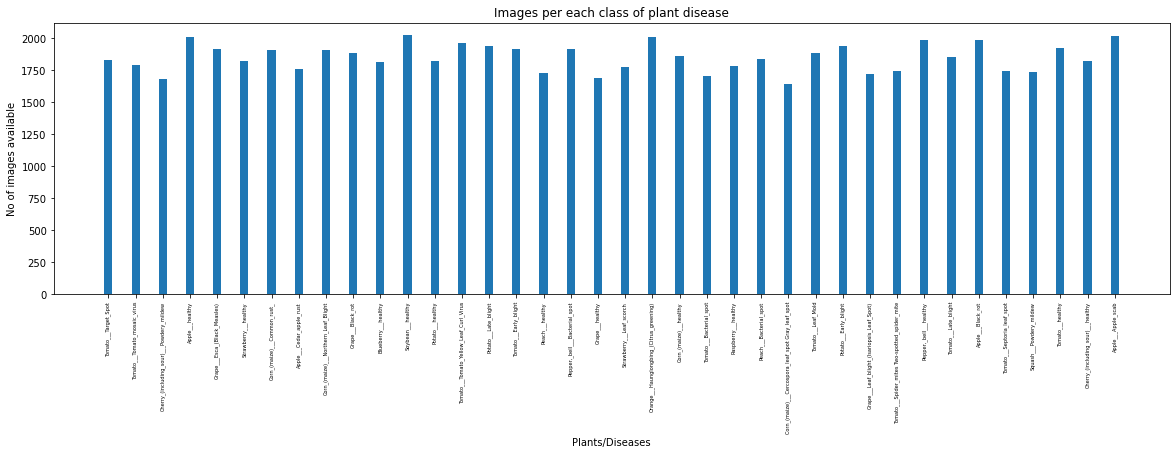

In [ ]:
# plotting number of images available for each disease
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

We can see that the dataset is almost balanced for all classes, so we are good to go forward

## Preparing the Data 📦

Making the datasets for training and testing.

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
batch_size=128

`batch_size` is the total number of images given as input at once in forward propagation of the CNN. Basically, batch size defines the number of samples that will be propagated through the network.

For instance, let's say you have 1050 training samples and you want to set up a batch_size equal to 100. The algorithm takes the first 100 samples (from 1st to 100th) from the training dataset and trains the network. Next, it takes the second 100 samples (from 101st to 200th) and trains the network again. We can keep doing this procedure until we have propagated all samples through of the network.

In [ ]:
train_set=train_datagen.flow_from_directory(train_dir,
                                               target_size=(256,256),batch_size=batch_size,class_mode='categorical')

Found 70295 images belonging to 38 classes.


In [ ]:
test_set=test_datagen.flow_from_directory(val_dir,
                                               target_size=(256,256),batch_size=batch_size,class_mode='categorical')

Found 17572 images belonging to 38 classes.


### Modelling 🧪

Now we've got our data prepared, we can start to fit model.

In [ ]:
model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#5th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


#6th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#7th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


#Fully connected 3rd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(len(diseases), activation='softmax'))

opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 batch_normalization_10 (Bat  (None, 256, 256, 64)     256       
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 256, 256, 64)      0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 128, 128)     204928    
                                                                 
 batch_normalization_11 (Bat  (None, 128, 128, 128)   

## Fitting the Model with Training and Validation Data 🔨

In [ ]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,reduce_learningrate]

epochs = 5

In [ ]:
history = model.fit(train_set,
                    steps_per_epoch=train_set.n//train_set.batch_size,
                    epochs=epochs,
                    validation_data = test_set,
                    validation_steps = test_set.n//test_set.batch_size,
                    callbacks=callbacks_list,
                    verbose=1 
                    )

Epoch 1/5
549/549 [==============================] - 1297s 2s/step - loss: 1.8069 - accuracy: 0.4977 - val_loss: 4.2848 - val_accuracy: 0.1348 - lr: 1.0000e-04
Epoch 2/5
549/549 [==============================] - 1269s 2s/step - loss: 0.6680 - accuracy: 0.8027 - val_loss: 1.4582 - val_accuracy: 0.5776 - lr: 1.0000e-04
Epoch 3/5
549/549 [==============================] - 1263s 2s/step - loss: 0.3766 - accuracy: 0.8868 - val_loss: 1.3522 - val_accuracy: 0.6301 - lr: 1.0000e-04
Epoch 4/5
549/549 [==============================] - 1226s 2s/step - loss: 0.2495 - accuracy: 0.9241 - val_loss: 1.2303 - val_accuracy: 0.6662 - lr: 1.0000e-04
Epoch 5/5
549/549 [==============================] - 1286s 2s/step - loss: 0.1846 - accuracy: 0.9425 - val_loss: 1.5300 - val_accuracy: 0.6177 - lr: 1.0000e-04


### Plots of training accuracy and testing accuracy as well as training loss and testing loss

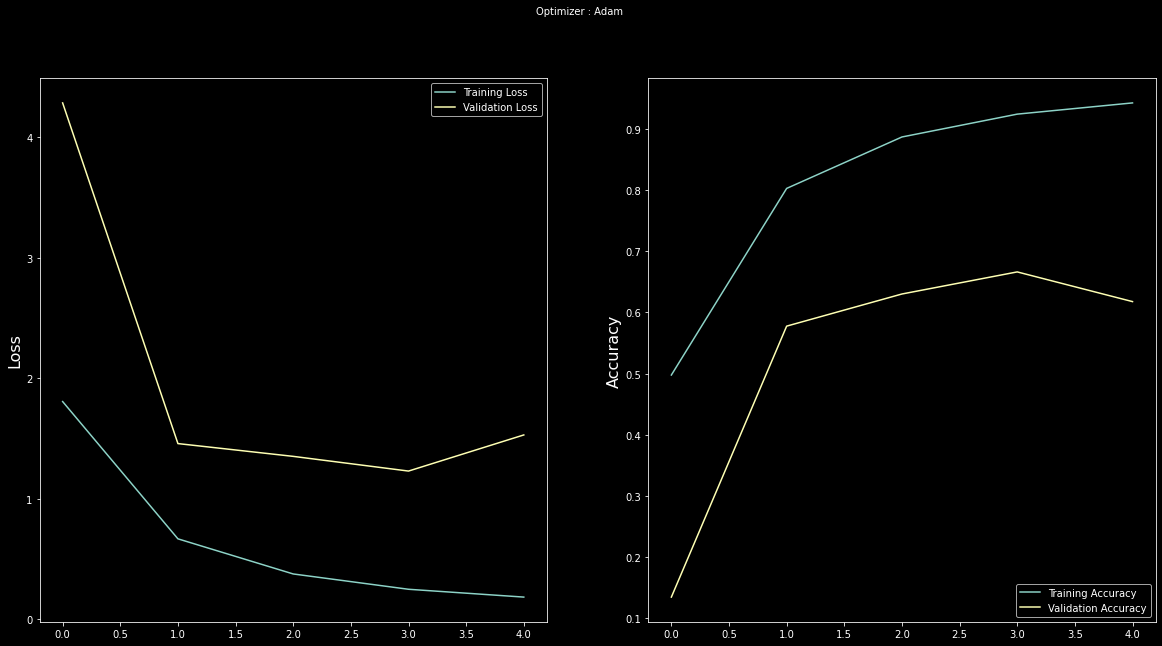

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()